**This notebook explores Carcinogenic Pesticide usage throughout CA counties**

In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path("../src/utils").resolve()))

import numpy as np
import pandas as pd

from utils import (
    create_CA_visualization,
    demographic_intensity_correlations,
    get_aggregate_results,
    into_gdf,
    top_10_barplot,
    top_n_df,
    trendPlot,
)

In [2]:
# data - counties
counties = pd.read_parquet(str(Path("../data/cal_counties.parquet").resolve()))
counties["Area Name"] = (counties["NAME"] + " County").str.strip()

carcData_counties = get_aggregate_results(
    "county",
    start_year=2022,
    start_month=1,
    end_year=2022,
    end_month=12,
    health_and_env_risks="CARC",
)

# merging
carcData_counties = carcData_counties.merge(
    counties[["Area Name", "geometry"]], on="Area Name"
)
carcData_counties = into_gdf(carcData_counties, "geometry")

data = carcData_counties

counties: 


,Area Name,FIPS,ai_intensity
0,Merced County,06047,1293.87
1,San Joaquin County,06077,1254.75
2,Stanislaus County,06099,1124.14
3,Fresno County,06019,991.12
4,Ventura County,06111,919.52
5,Kings County,06031,912.03
6,Sutter County,06101,814.23
7,Santa Cruz County,06087,788.74
8,Kern County,06029,712.02
9,Monterey County,06053,623.29


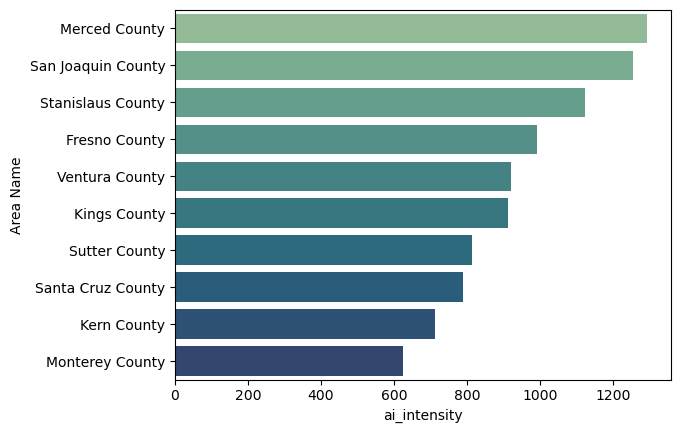

In [3]:
print("counties: ")
carc_top_10_counties = top_n_df(data, "", "ai_intensity", n=10)
display(carc_top_10_counties)

top_10_barplot(carc_top_10_counties)

correlations with counties: 


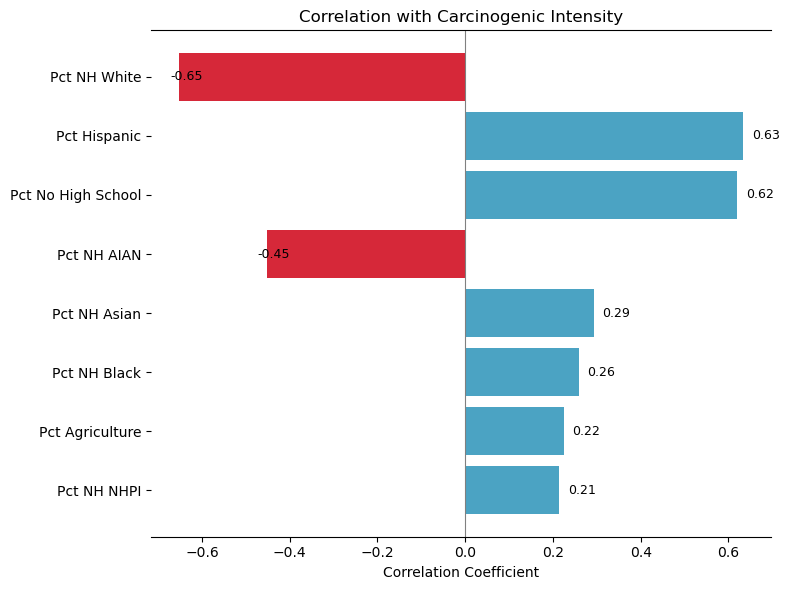

,Carcinogenic Intensity
Pct NH Black,0.258539
Pct Hispanic,0.633682
Pct NH White,-0.651543
Pct NH Asian,0.292804
Pct NH AIAN,-0.452971
Pct NH NHPI,0.213677
Pct No High School,0.619189
Pct Agriculture,0.224585


In [6]:
# school correlations:
print("correlations with counties: ")
data["Carcinogenic Intensity"] = np.log1p(data["ai_intensity"])
demographic_intensity_correlations(data, "Carcinogenic Intensity")

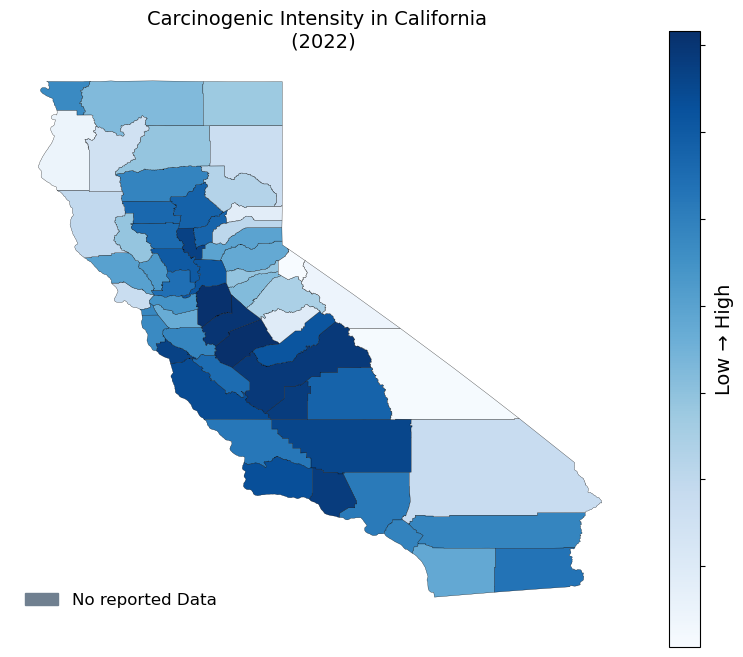

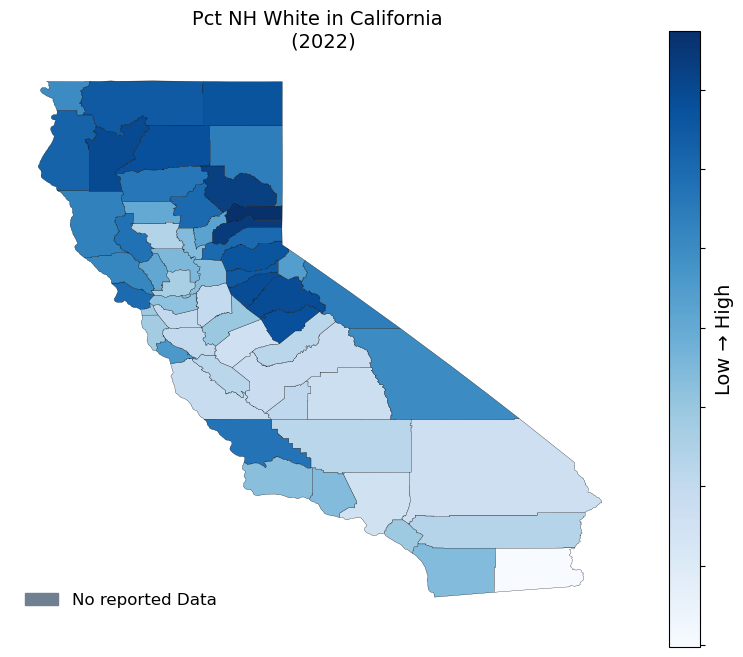

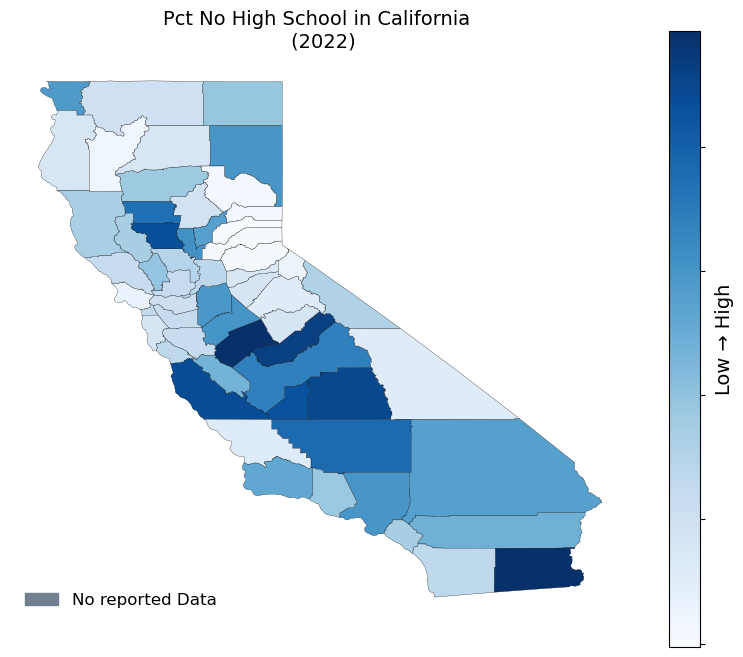

In [7]:
create_CA_visualization(data, "Carcinogenic Intensity", "2022")
create_CA_visualization(data, "Pct NH White", "2022")
create_CA_visualization(data, "Pct No High School", "2022")

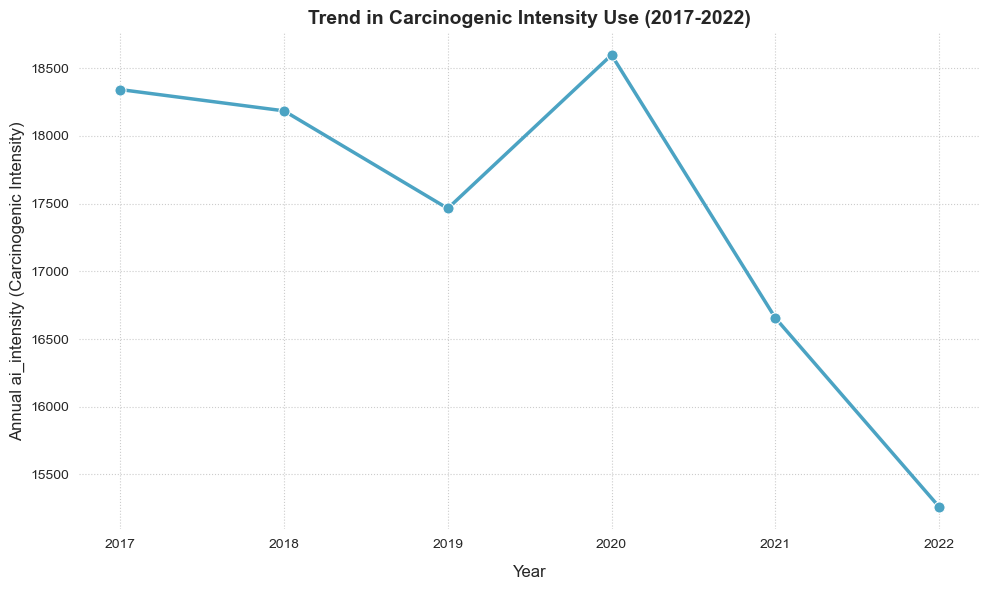

In [8]:
trendPlot(
    "Carcinogenic Intensity", [("health_and_env_risks", ["CARC"])], endpoint="county"
)